Overview figures for validation dataset


In [7]:
import pandas as pd
import proplot as pplt
import numpy as np

In [35]:
df = pd.read_csv('../data/validation_tables/qualitative_assessment_tables/all_100km_cases.csv')

In [36]:
df['start_date'] = pd.to_datetime(df['start_date'].values)
df['month'] = df['start_date'].dt.month

In [37]:
df.loc[:, 'visible_sea_ice'] = df.loc[:, 'visible_sea_ice'].where(df.loc[:, 'visible_sea_ice']=='yes')
df.loc[:, 'visible_landfast_ice'] = df.loc[:, 'visible_landfast_ice'].where(df.loc[:, 'visible_landfast_ice']=='yes')
df.loc[:, 'visible_floes'] = df.loc[:, 'visible_floes'].where(df.loc[:, 'visible_floes']=='yes')

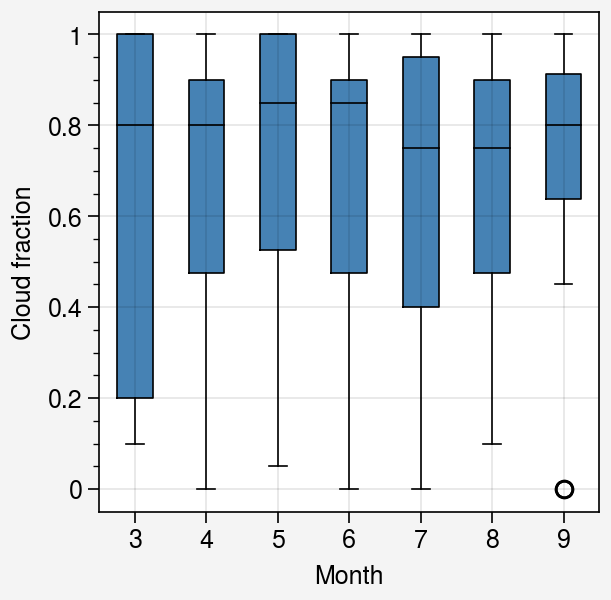

In [44]:
fig, ax = pplt.subplots()
ax.box(df.pivot_table(index='start_date', values='cloud_fraction', columns='month'), facecolor='steelblue')
ax.format(ylabel='Cloud fraction', xlabel='Month', xlocator=np.arange(3, 10), xtickminor=False)
fig.save('../figures/cloud_fraction.png', dpi=300)

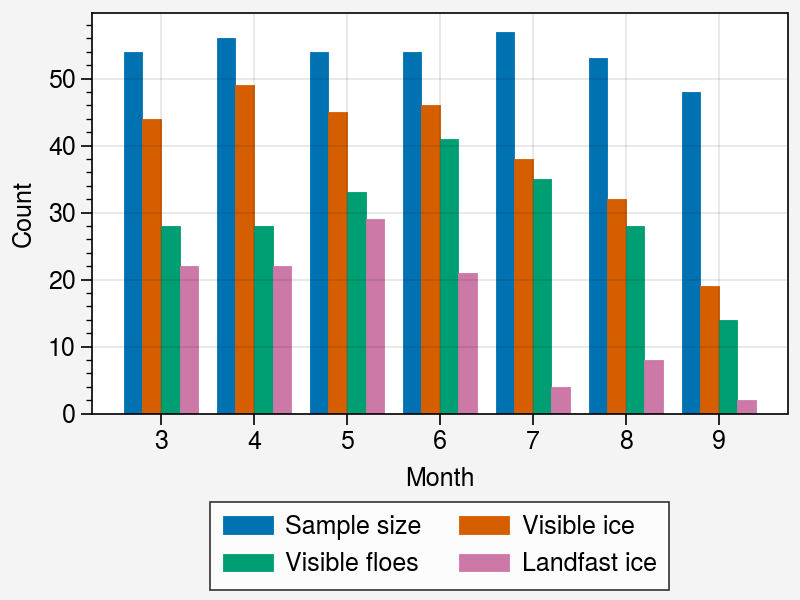

In [52]:
fig, ax = pplt.subplots(height=3, width=4)
df_counts = df.loc[:, ['month', 'cloud_fraction', 'visible_sea_ice', 'visible_floes', 'visible_landfast_ice']
                            ].rename({'cloud_fraction': 'Sample size',
                                      'visible_sea_ice': 'Visible ice',
                                      'visible_floes': 'Visible floes',
                                      'visible_landfast_ice': 'Landfast ice'}, axis=1).groupby('month').count()
ax.bar(df_counts, cycle='colorblind')
ax.legend(loc='b', ncols=2)
ax.format(ylabel='Count', xlabel='Month', xlocator=np.arange(3, 10), xtickminor=False)
fig.save('../figures/data_availability.png', dpi=300)

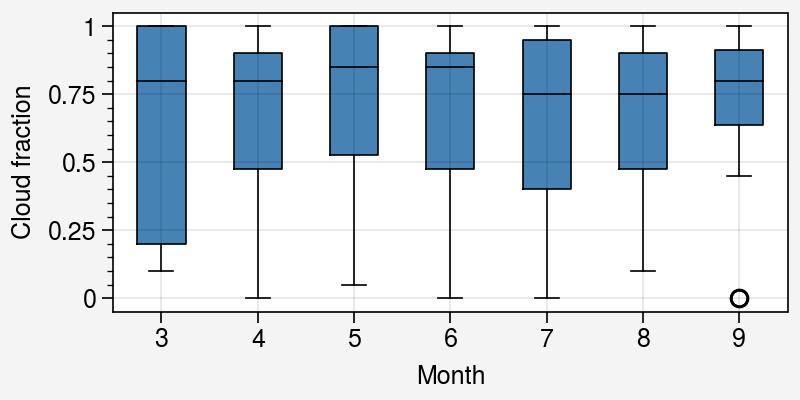

In [55]:
fig, ax = pplt.subplots(height=2, width=4)
ax.box(df.pivot_table(index='start_date', values='cloud_fraction', columns='month'), facecolor='steelblue')
ax.format(ylabel='Cloud fraction', xlabel='Month', xlocator=np.arange(3, 10), xtickminor=False)
fig.save('../figures/cloud_fraction.png', dpi=300)

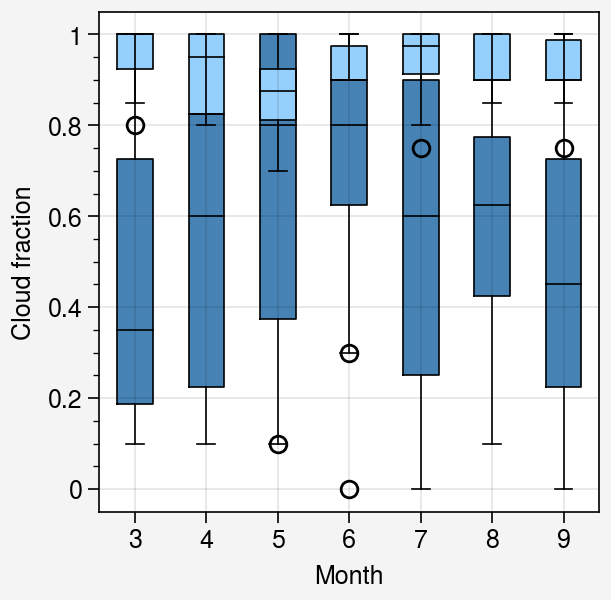

In [27]:
fig, ax = pplt.subplots()
ax.box(df.loc[df.cloud_category=='thin'].pivot_table(index='start_date', values='cloud_fraction', columns='month'), facecolor='steelblue')
ax.box(df.loc[df.cloud_category=='opaque'].pivot_table(index='start_date', values='cloud_fraction', columns='month'), facecolor='light blue')

ax.format(ylabel='Cloud fraction', xlabel='Month', xlocator=np.arange(3, 10), xtickminor=False)

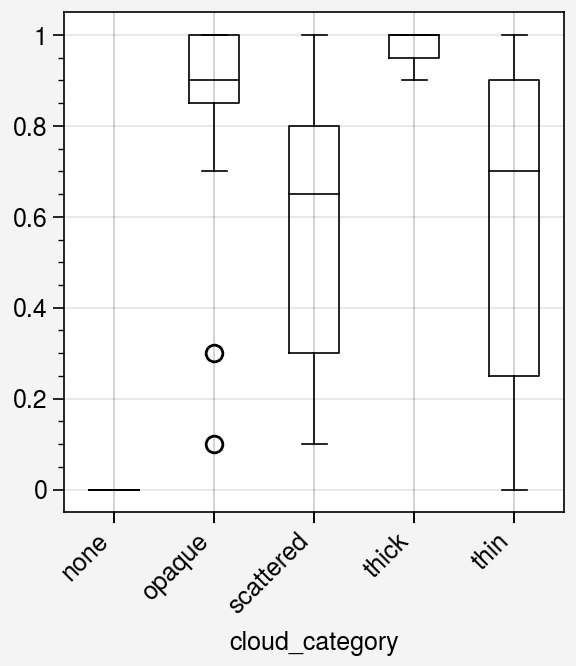

In [42]:
fig, ax = pplt.subplots()
ax.box(df.pivot_table(index='start_date', values='cloud_fraction', columns='cloud_category'))
ax.format(xrotation=45)
# ax.format(ylabel='Cloud fraction', xlabel='Month', xlocator=np.arange(3, 10), xtickminor=False)

In [43]:
df.loc[df.cloud_category=='thick']

,Unnamed: 0,case_number,long_name,region,start_date,end_date,satellite,dx_km,visible_sea_ice,visible_landfast_ice,...,cloud_fraction,cloud_category,artifacts,qa_analyst,qa_reviewer,fl_analyst,fl_reviewer,notes,fl_analyst_comparison,month
23,23,134,134-beaufort_sea-100km_by_100km-20170925-20170926,beaufort_sea,2017-09-25,2017-09-26,terra,100,NaN,NaN,...,0.9,thick,yes,daniel,minki,NaN,NaN,NaN,NaN,9
24,24,136,136-beaufort_sea-100km_by_100km-20180925-20180926,beaufort_sea,2018-09-25,2018-09-26,aqua,100,NaN,NaN,...,1.0,thick,no,daniel,minki,NaN,NaN,NaN,NaN,9
25,25,136,136-beaufort_sea-100km_by_100km-20180925-20180926,beaufort_sea,2018-09-25,2018-09-26,terra,100,NaN,NaN,...,1.0,thick,no,daniel,minki,NaN,NaN,NaN,NaN,9
26,26,137,137-beaufort_sea-100km_by_100km-20190319-20190320,beaufort_sea,2019-03-19,2019-03-20,aqua,100,NaN,NaN,...,1.0,thick,no,daniel,minki,NaN,NaN,NaN,NaN,3
27,27,137,137-beaufort_sea-100km_by_100km-20190319-20190320,beaufort_sea,2019-03-19,2019-03-20,terra,100,NaN,NaN,...,1.0,thick,no,daniel,minki,NaN,NaN,NaN,NaN,3
